# Logistic Regression using Tensorflow 

### Importing Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import tensorflow as tf

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

### Creating Training Data

In [5]:
xData = np.random.randn(100000,1)

In [6]:
xData[:5]

array([[-0.19138157],
       [-0.48837522],
       [ 0.0079911 ],
       [-0.72196213],
       [-0.34692847]])

In [7]:
yData = np.zeros((xData.shape[0],1))

In [8]:
yData[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [9]:
for i in range(xData.shape[0]):
    yData[i,0] = 0 if xData[i,0] < 0 else 1 

### Training Baseline Implementation

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
classifier = LogisticRegression(C=1e5)

In [12]:
classifier.fit(xData,yData)

C:\Users\Lolly\Anaconda3\envs\carnd-term1\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [13]:
prediction = classifier.predict(xData)

In [14]:
prediction = prediction.reshape(yData.shape[0],1)

In [15]:
prediction.shape

(100000, 1)

In [16]:
yData.shape

(100000, 1)

In [17]:
acc = 100 - np.mean(np.abs(prediction-yData))*100

#### Baseline Training Prediction

In [18]:
print(acc)

99.993


### Creating Test Data 

In [19]:
xTest = np.random.randn(10000,1)

In [20]:
yTest = np.zeros((xTest.shape[0],1))

In [21]:
for i in range(xTest.shape[0]):
    yTest[i,0] = 0 if xTest[i,0] < 0 else 1 

### Test Baseline Implementation 

In [22]:
prediction_test = classifier.predict(xTest)

In [23]:
acc_test = 100 - np.mean(np.abs(prediction_test-yTest.reshape(-1)))*100

#### Baseline Test Prediction

In [24]:
print(acc_test)

99.99


### TensorFlow Implementation Training

In [25]:
W = tf.Variable(tf.ones([1, 1]), name="W")
b = tf.Variable(tf.zeros([1]), name="b")

In [26]:
x = tf.placeholder(tf.float32,[None,1])

In [94]:
y_ = tf.placeholder(tf.float32,[None,1])

In [113]:
y = tf.matmul(x,W)+b

In [114]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_,logits=y))

In [118]:
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [119]:
init = tf.global_variables_initializer()

In [120]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(10000):
        sess.run(train,feed_dict={x:xData,y_:yData})
        if (i+1) % 1000 ==0:
            print("\nAfter iteration {}".format(i))
            print("loss: {}".format(sess.run(loss,feed_dict={x:xData,y_:yData})))
            print("w: {}".format(sess.run(W)))
            print("b: {}".format(sess.run(b)))
    result = sess.run(y,feed_dict={x:xData,y_:yData})


After iteration 999
loss: 0.3748539090156555
w: [[1.1795758]]
b: [-0.00043294]

After iteration 1999
loss: 0.3496710956096649
w: [[1.3381853]]
b: [-0.0007363]

After iteration 2999
loss: 0.32937881350517273
w: [[1.4805778]]
b: [-0.00094627]

After iteration 3999
loss: 0.31260284781455994
w: [[1.6100606]]
b: [-0.00108787]

After iteration 4999
loss: 0.29844391345977783
w: [[1.7290199]]
b: [-0.00117877]

After iteration 5999
loss: 0.28629270195961
w: [[1.8392313]]
b: [-0.00123165]

After iteration 6999
loss: 0.2757174074649811
w: [[1.9420497]]
b: [-0.0012558]

After iteration 7999
loss: 0.2664056122303009
w: [[2.0385334]]
b: [-0.00125814]

After iteration 8999
loss: 0.258124977350235
w: [[2.1295214]]
b: [-0.00124383]

After iteration 9999
loss: 0.25069713592529297
w: [[2.215696]]
b: [-0.00121682]


In [121]:
assert(result.shape==yData.shape)

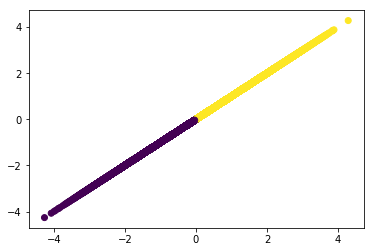

In [126]:
plt.scatter(xData,xData,c=yData)

In [122]:
result_t = np.zeros((result.shape[0],1))

In [123]:
for i in range(result.shape[0]):
    result_t[i,0] = 1 if result[i,0] >= 0 else 0

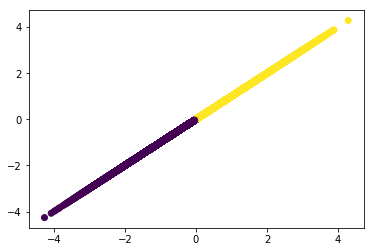

In [127]:
plt.scatter(xData,xData,c=result_t)

In [124]:
acc = 100 - np.mean(np.abs(result_t-yData))*100

#### Tensorflow Training Prediction

In [125]:
print(acc)

99.982


### Tensorflow Implementation Test

In [130]:
with tf.Session() as sess:
    sess.run(init)
    result_test = sess.run(y,feed_dict={x:xTest,y:yTest})

In [132]:
test_acc = 100 - np.mean(np.abs(result_test-yTest))*100

#### Tensorflow Test Prediction

In [133]:
print(test_acc)

100.0
